In [321]:
oxup = read.csv('data.csv')
oxup$Year = as.factor(oxup$Year)
oxup$Temp = as.factor(oxup$Temp)
head(oxup)
summary(oxup)

Year,Semester,Temp,Uptake
<fct>,<fct>,<fct>,<dbl>
2019,F,25,11.55
2019,F,25,8.62
2019,F,25,34.21
2019,F,25,4.33
2019,F,25,12.36
2019,F,25,9.89


      Year    Semester Temp         Uptake      
 2019   :55   F:229    25:118   Min.   : 3.878  
 2013   :48   S: 28    35:139   1st Qu.:16.225  
 2014   :38                     Median :22.500  
 2015   :26                     Mean   :24.717  
 2016   :24                     3rd Qu.:29.550  
 2011   :22                     Max.   :69.400  
 (Other):44                     NA's   :2       

In [322]:
# Q10 value for 2019
(mean(oxup$Uptake[oxup$Year == '2019' & oxup$Temp=='35']) / mean(oxup$Uptake[oxup$Year == '2019' & oxup$Temp=='25'])) ^ (10/(35-25))

[1] 1.716544

In [323]:
# Q10 value for 2009
(mean(oxup$Uptake[oxup$Year == '2009' & oxup$Temp=='35']) / mean(oxup$Uptake[oxup$Year == '2009' & oxup$Temp=='25'])) ^ (10/(35-25))

[1] 1.504412

In [361]:
lm25 = (lm(sqrt(oxup$Uptake[oxup$Temp == '25'])~as.numeric(oxup$Year[oxup$Temp == '25'])))

In [362]:
apa.reg.table(lm25, filename = "lm25.doc")



Regression results using sqrt(oxup$Uptake[oxup$Temp == "25"]) as the criterion
 

                                Predictor       b       b_95%_CI  beta
                              (Intercept)  4.84**   [4.48, 5.20]      
 as.numeric(oxup$Year[oxup$Temp == "25"]) -0.13** [-0.19, -0.07] -0.37
                                                                      
                                                                      
                                                                      
    beta_95%_CI sr2 sr2_95%_CI      r             Fit
                                                     
 [-0.54, -0.20] .14 [.04, .25] -.37**                
                                          R2 = .136**
                                      95% CI[.04,.25]
                                                     

Note. A significant b-weight indicates the beta-weight and semi-partial correlation are also significant.
b represents unstandardized regression weights. beta indica

In [363]:
lm35 = (lm(sqrt(oxup$Uptake[oxup$Temp == '35'])~as.numeric(oxup$Year[oxup$Temp == '35'])))

In [364]:
apa.reg.table(lm35, filename = "lm35.doc")



Regression results using sqrt(oxup$Uptake[oxup$Temp == "35"]) as the criterion
 

                                Predictor       b       b_95%_CI  beta
                              (Intercept)  6.24**   [5.79, 6.69]      
 as.numeric(oxup$Year[oxup$Temp == "35"]) -0.14** [-0.22, -0.07] -0.32
                                                                      
                                                                      
                                                                      
    beta_95%_CI sr2 sr2_95%_CI      r             Fit
                                                     
 [-0.48, -0.16] .10 [.03, .20] -.32**                
                                          R2 = .101**
                                      95% CI[.03,.20]
                                                     

Note. A significant b-weight indicates the beta-weight and semi-partial correlation are also significant.
b represents unstandardized regression weights. beta indica

In [336]:
# Ancova example
oxup.anc = lm((sqrt(Uptake))~as.numeric(Year)*Temp, data = oxup)
summary(oxup.anc)


Call:
lm(formula = (sqrt(Uptake)) ~ as.numeric(Year) * Temp, data = oxup)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.49993 -0.58858 -0.06083  0.49973  2.92127 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              4.83936    0.23472  20.618  < 2e-16 ***
as.numeric(Year)        -0.12768    0.03840  -3.325  0.00102 ** 
Temp35                   1.39668    0.30592   4.566 7.81e-06 ***
as.numeric(Year):Temp35 -0.01710    0.05004  -0.342  0.73277    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9612 on 251 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.3743,	Adjusted R-squared:  0.3668 
F-statistic: 50.04 on 3 and 251 DF,  p-value: < 2.2e-16


Warning message in geom_abline(slope = (-0.12768), intercept = (4.83936), aes()):
“Using `intercept` and/or `slope` with `mapping` may not have the desired result as mapping is overwritten if either of these is specified
”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Saving 7 x 7 in image

Warning message:
“Removed 2 rows containing missing values (geom_point).”


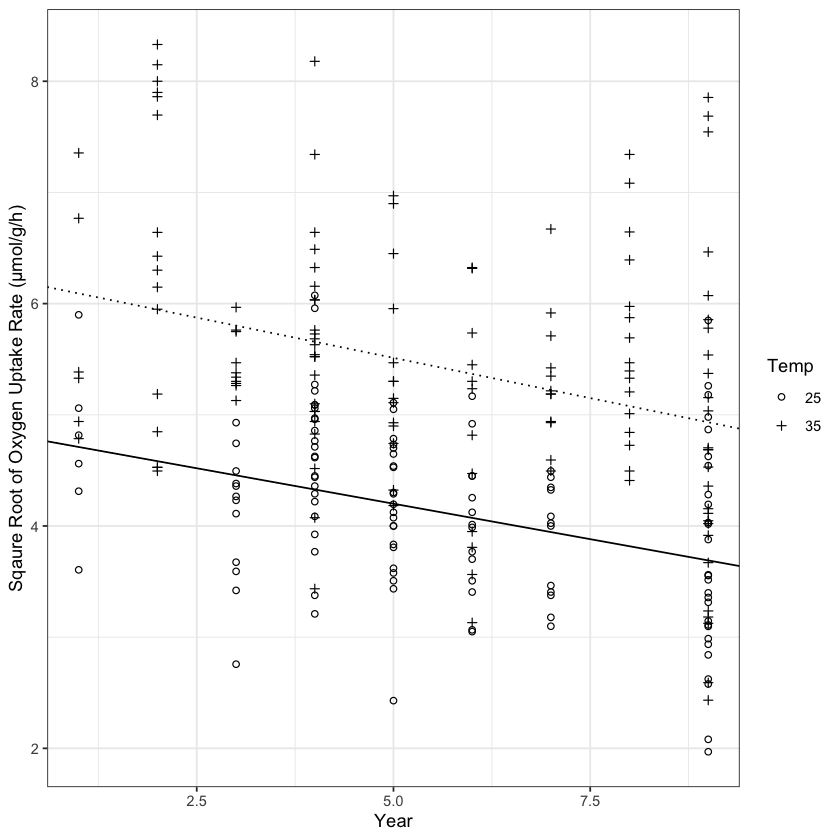

In [358]:
ggplot(oxup, aes(as.numeric(Year), sqrt(Uptake), shape = Temp)) + 
    geom_point() + geom_abline(slope = (-0.12768), intercept = (4.83936), aes()) + 
    geom_abline(intercept = (4.83936+1.39668), slope = (-0.12768+-0.01710), linetype="dotted") +
    theme_bw() +
    scale_shape_manual(values=c(1, 3)) +
    xlab("Year") + ylab("Sqaure Root of Oxygen Uptake Rate (µmol/g/h)")
ggsave(filename="myPlot.pdf")

In [277]:
-0.13264^2

[1] -0.01759337

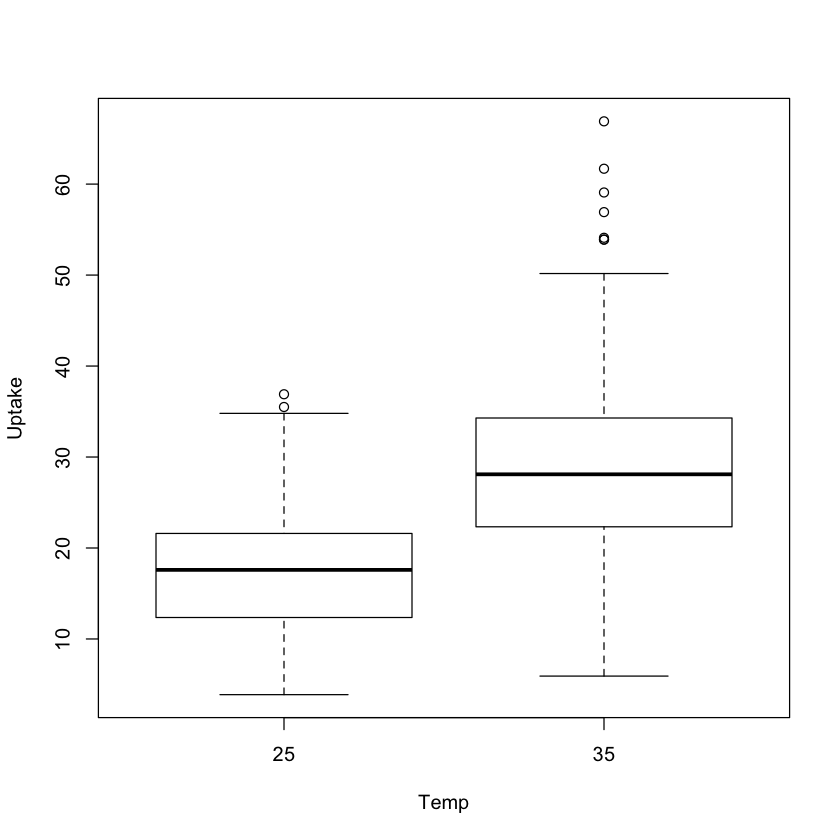

In [83]:
boxplot(Uptake~Temp, data = oxup)

In [128]:
# Creation of a linear model
oxup.lm = lm(log(Uptake)~Year*Temp, data = oxup)
summary(oxup.lm)


Call:
lm(formula = log(Uptake) ~ Year * Temp, data = oxup)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.27261 -0.22863  0.00383  0.23059  1.07117 

Coefficients: (1 not defined because of singularities)
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.07657    0.16239  18.946  < 2e-16 ***
Year2011        -0.28739    0.19888  -1.445  0.14986    
Year2013        -0.02893    0.18156  -0.159  0.87356    
Year2014        -0.25487    0.18320  -1.391  0.16553    
Year2015        -0.33238    0.19409  -1.713  0.08818 .  
Year2016        -0.39567    0.19888  -1.989  0.04787 *  
Year2017        -0.04665    0.19042  -0.245  0.80667    
Year2019        -0.52599    0.17894  -2.939  0.00363 ** 
Temp35           0.39918    0.22965   1.738  0.08355 .  
Year2011:Temp35  0.20566    0.28591   0.719  0.47269    
Year2013:Temp35 -0.02489    0.25676  -0.097  0.92287    
Year2014:Temp35  0.13075    0.26690   0.490  0.62468    
Year2015:Temp35 -0.03575    0.27790  -0

In [103]:
require(car)

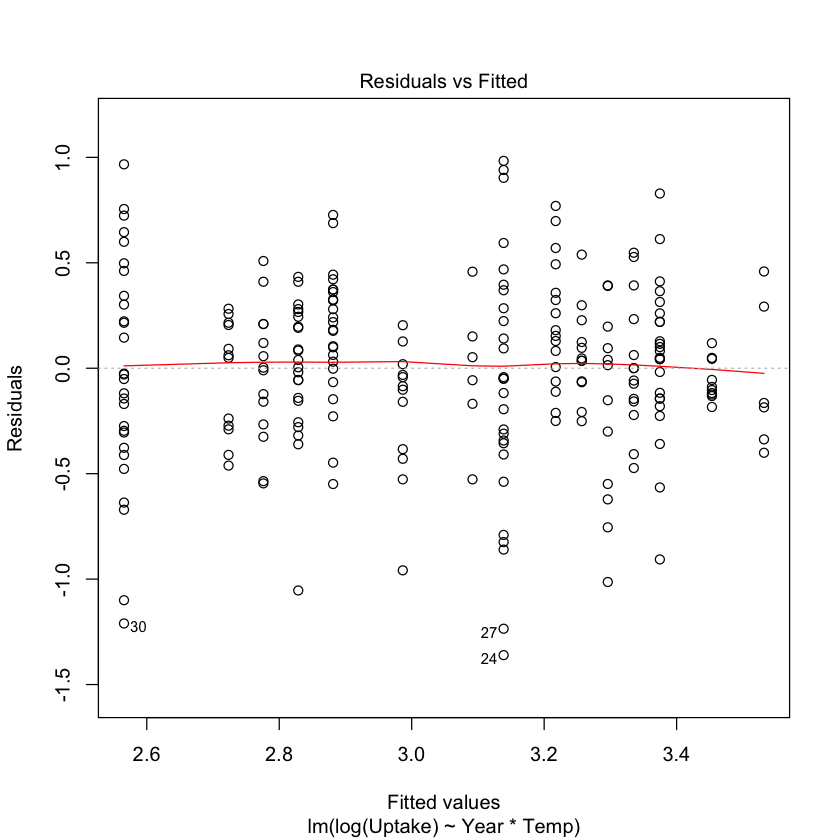

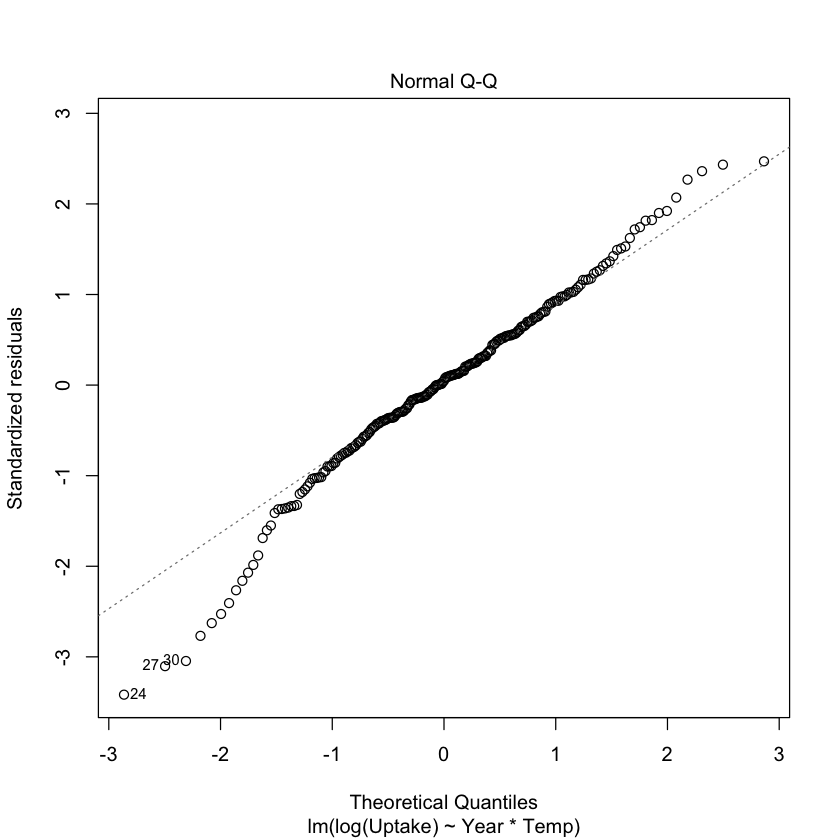

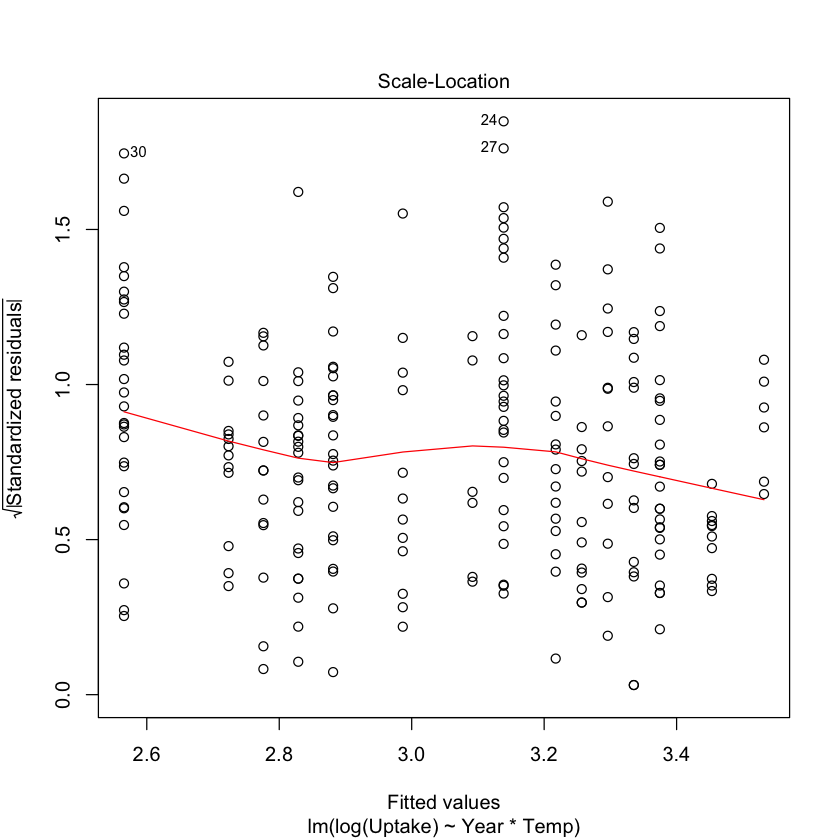


	Shapiro-Wilk normality test

data:  resid(oxup.lm)
W = 0.97992, p-value = 0.001814


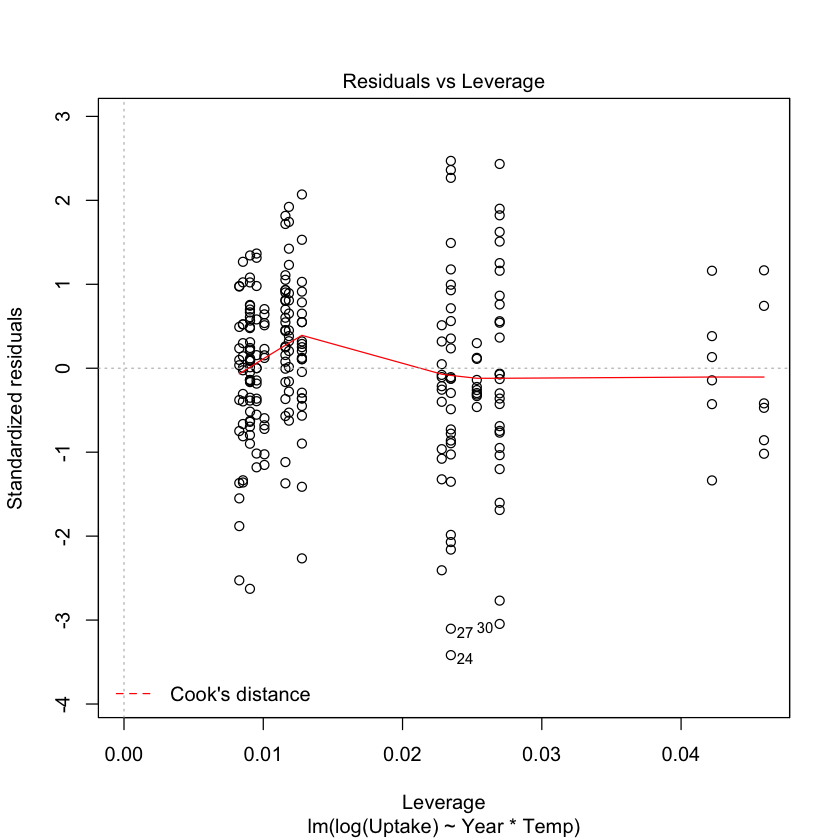

In [112]:
plot(oxup.lm)
shapiro.test(resid(oxup.lm))

In [137]:
oxup.aov = aov(log1p(Uptake)~Year*Temp, data = oxup)
summary(oxup.aov)

             Df Sum Sq Mean Sq F value   Pr(>F)    
Year          7  7.654   1.093   7.792 1.94e-08 ***
Temp          1 11.587  11.587  82.563  < 2e-16 ***
Year:Temp     6  0.449   0.075   0.534    0.782    
Residuals   224 31.435   0.140                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
2 observations deleted due to missingness


	Shapiro-Wilk normality test

data:  resid(oxup.aov)
W = 0.98639, p-value = 0.02247


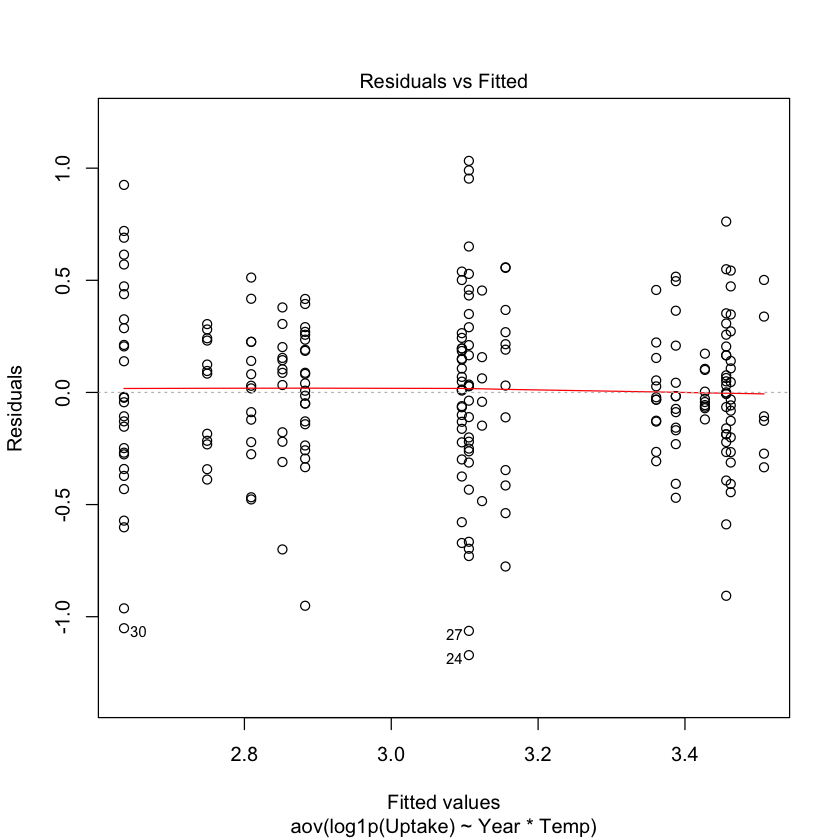

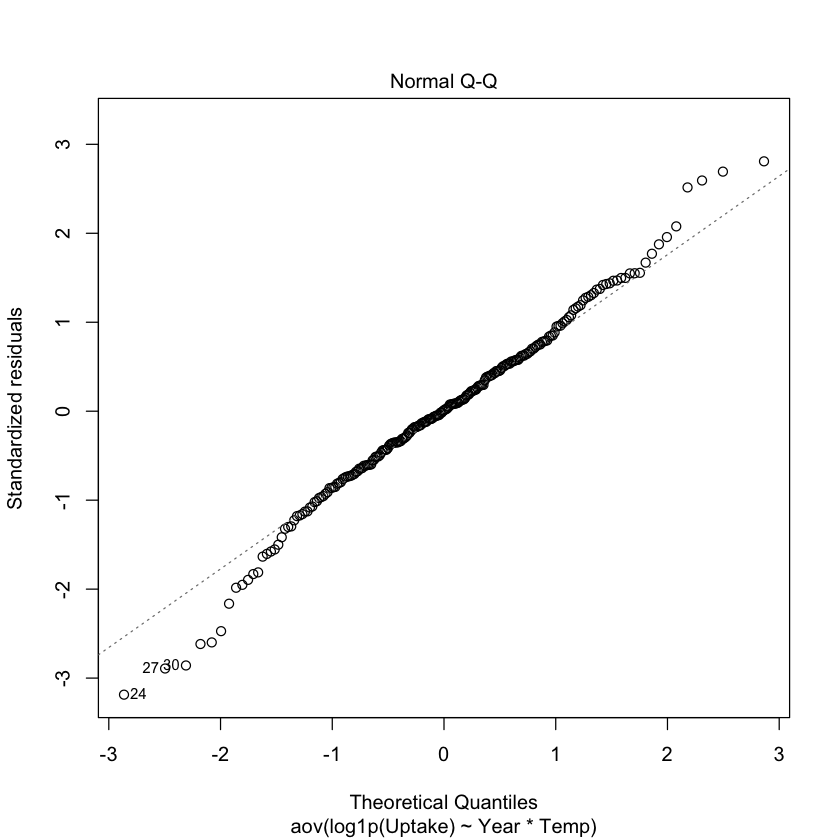

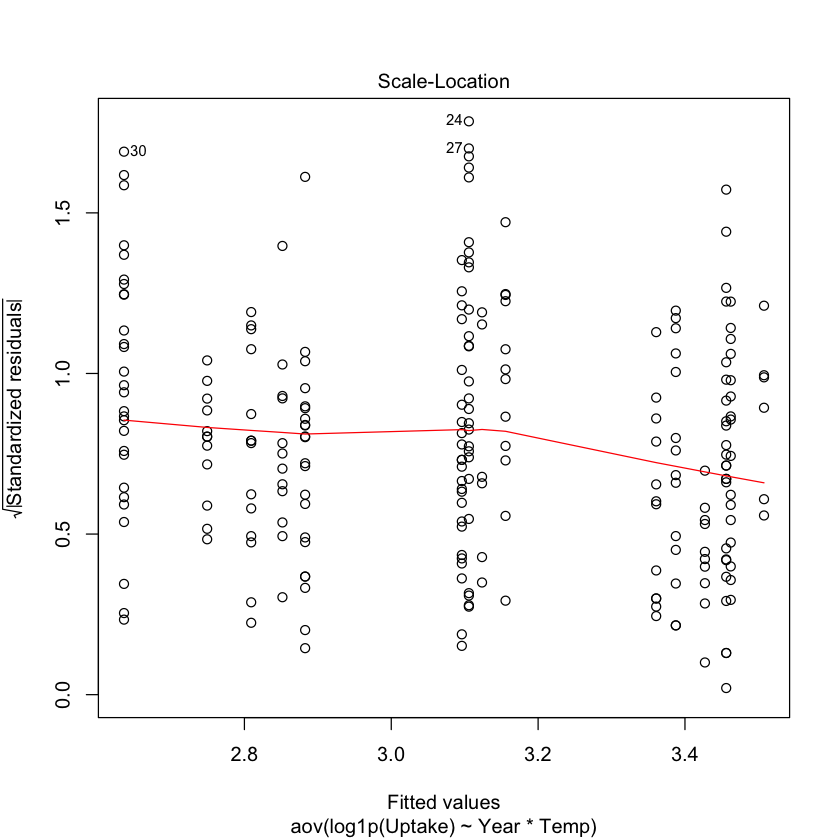

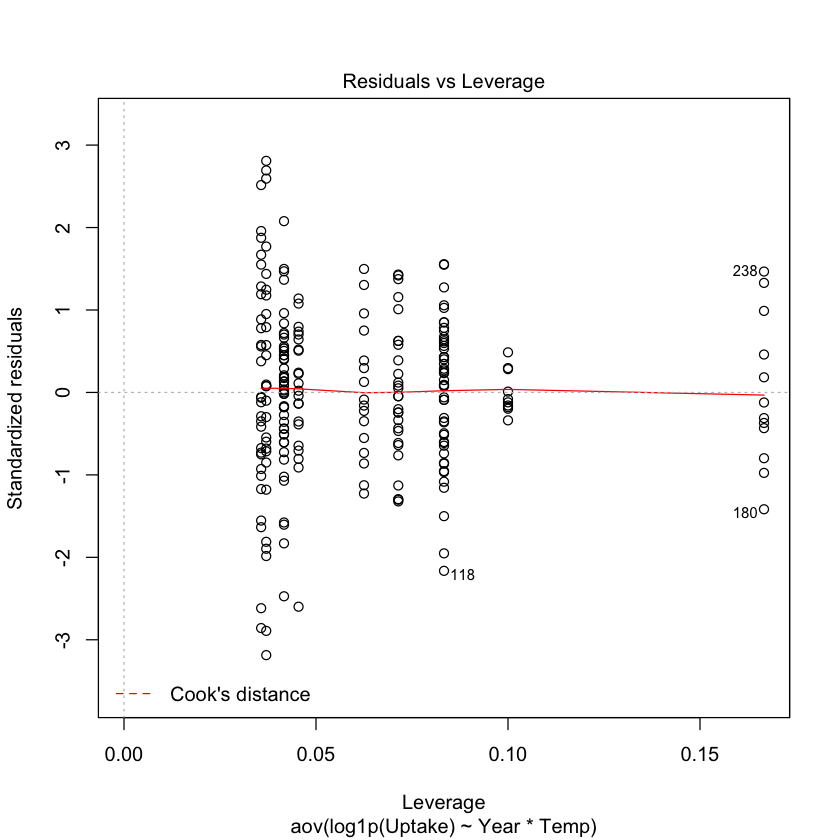

In [138]:
shapiro.test(resid(oxup.aov))
plot(oxup.aov)

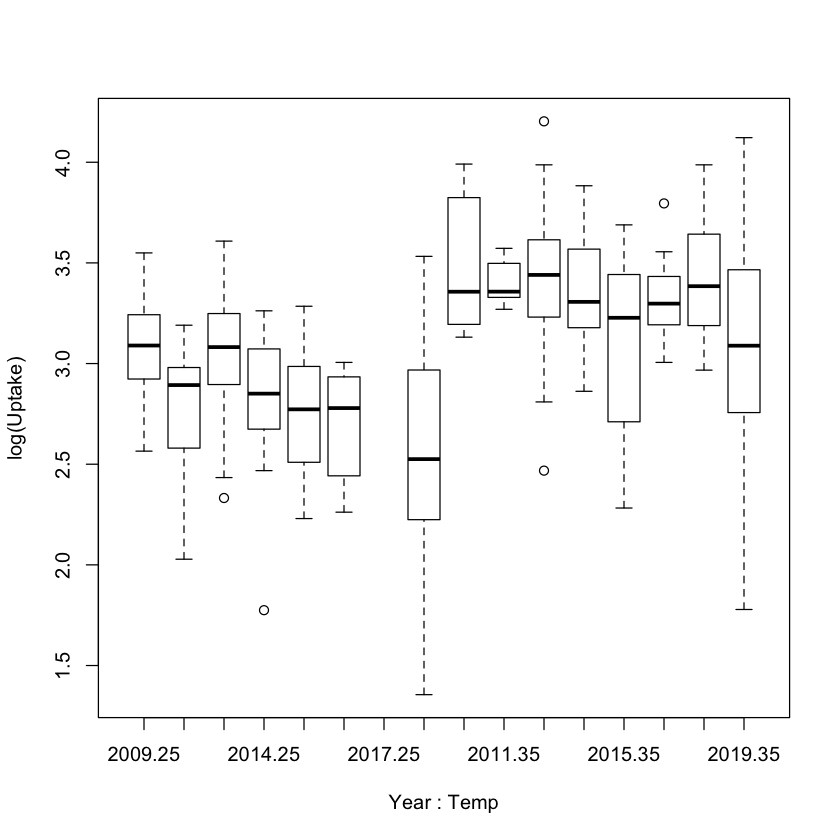

In [131]:
boxplot(log(Uptake)~Year+Temp, data = oxup)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log1p(Uptake) ~ Year * Temp, data = oxup)

$Year
                 diff         lwr         upr     p adj
2011-2009 -0.20229633 -0.61365208  0.20905941 0.8042985
2013-2009 -0.03949106 -0.40944227  0.33046015 0.9999804
2014-2009 -0.23660668 -0.61869064  0.14547729 0.5559441
2015-2009 -0.34652414 -0.74655599  0.05350770 0.1437924
2016-2009 -0.26058909 -0.66585033  0.14467216 0.5062133
2017-2009  0.14671547 -0.29101671  0.58444764 0.9701528
2019-2009 -0.44903670 -0.81424908 -0.08382431 0.0052135
2013-2011  0.16280528 -0.13231369  0.45792425 0.6950692
2014-2011 -0.03431034 -0.34450297  0.27588228 0.9999750
2015-2011 -0.14422781 -0.47627719  0.18782157 0.8869233
2016-2011 -0.05829275 -0.39662393  0.28003843 0.9995076
2017-2011  0.34901180 -0.02760573  0.72562933 0.0915477
2019-2011 -0.24674036 -0.53589672  0.04241600 0.1574541
2014-2013 -0.19711562 -0.44984041  0.05560917 0.2530920
2015-2013 -0.307

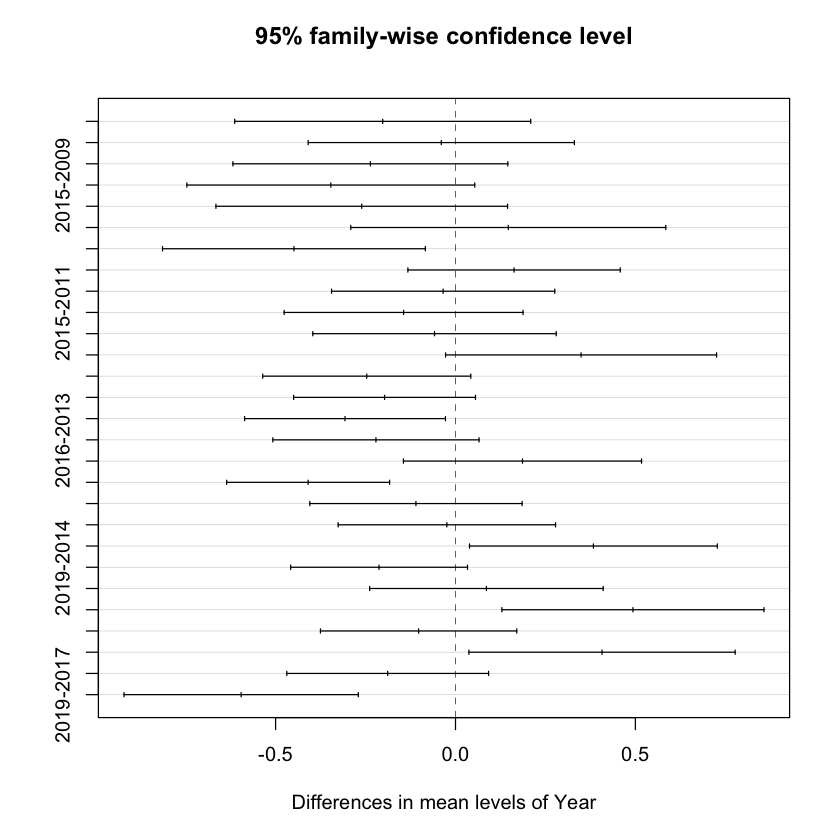

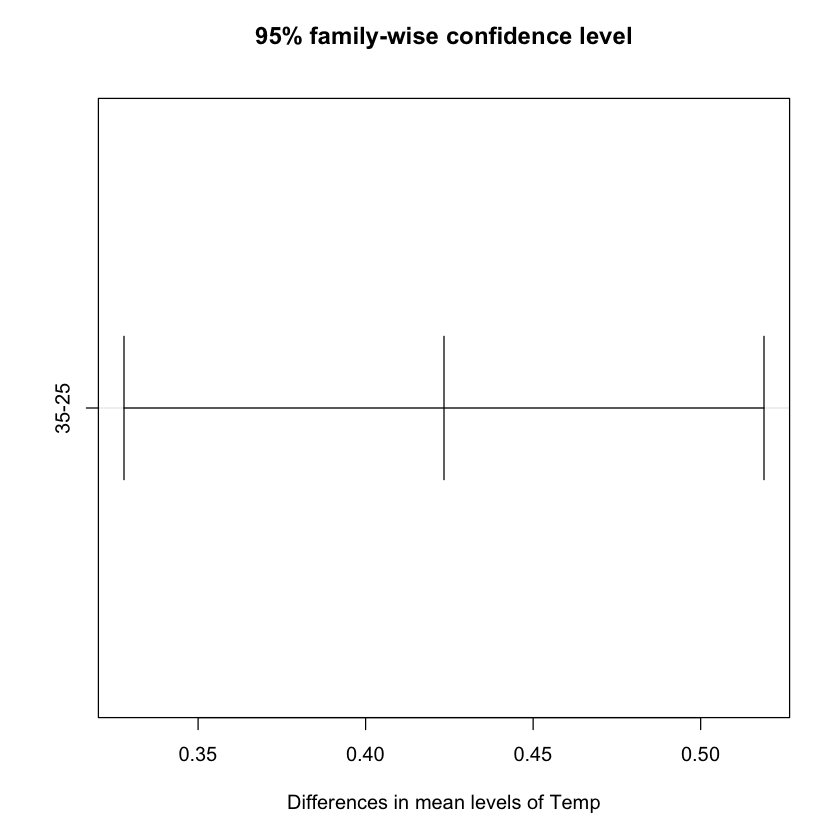

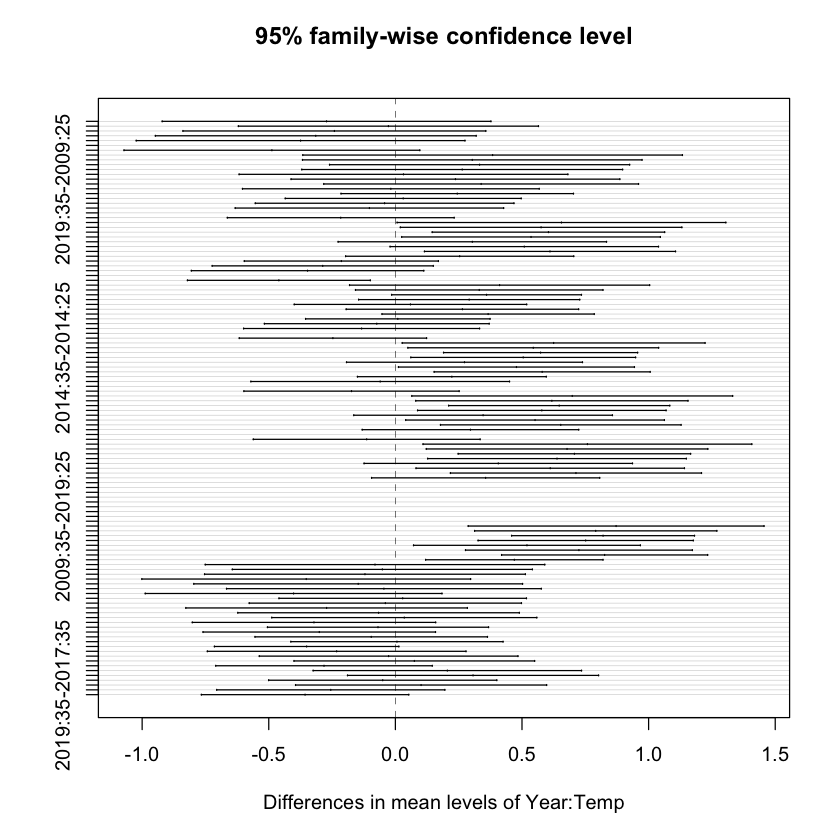

In [140]:
tuk = TukeyHSD(oxup.aov)
tuk
plot(tuk)

In [227]:
cor.test(x = as.numeric(oxup$Year[oxup$Temp == '25']), y = oxup$Uptake[oxup$Temp == '25'], method = 'pearson')


	Pearson's product-moment correlation

data:  as.numeric(oxup$Year[oxup$Temp == "25"]) and oxup$Uptake[oxup$Temp == "25"]
t = -3.9609, df = 116, p-value = 0.0001293
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4950309 -0.1753366
sample estimates:
       cor 
-0.3451566 


In [228]:
# Now we're making grapsh

In [234]:
require(sjPlot)

In [241]:
summary(oxup)

      Year    Semester Temp         Uptake      
 2019   :55   F:213    25:118   Min.   : 3.878  
 2013   :48   S: 28    35:123   1st Qu.:16.050  
 2014   :38                     Median :22.120  
 2015   :26                     Mean   :23.471  
 2016   :24                     3rd Qu.:28.550  
 2011   :22                     Max.   :66.900  
 (Other):28                     NA's   :2       

In [267]:
require(qwraps2)
require(magrittr)
require(dplyr)

In [271]:
summary =
    list("Uptake at 25 C" =
        list("min" = ~ min(.data$Uptake[.data$Temp == '25']),
        "max" = ~ max(.data$Uptake[.data$Temp == '25']),
        "mean (sd)" = ~ qwraps2::mean_sd(.data$Uptake[.data$Temp == '25'])),
    "Uptake at 35 C" =
        list("min" = ~ min(.data$Uptake[.data$Temp == '35']),
        "max" = ~ max(.data$Uptake[.data$Temp == '35']),
        "mean (sd)" = ~ qwraps2::mean_sd(.data$Uptake[.data$Temp == '35']))
    )

In [272]:
whole = summary_table(oxup, summary)
whole

,oxup (N = 241)
min,3.8777
max,36.9
mean (sd),17.58 $\pm$ 6.56
min,NA
max,NA
mean (sd),121; NA $\pm$ NA


In [273]:
summary_table(dplyr::group_by(oxup, Year), summary)

Warning message in min(.data$Uptake[.data$Temp == "25"]):
“no non-missing arguments to min; returning Inf”
Warning message in max(.data$Uptake[.data$Temp == "25"]):
“no non-missing arguments to max; returning -Inf”


,Year: 2009 (N = 12),Year: 2011 (N = 22),Year: 2013 (N = 48),Year: 2014 (N = 38),Year: 2015 (N = 26),Year: 2016 (N = 24),Year: 2017 (N = 16),Year: 2019 (N = 55)
min,13.0000,7.6000,10.3000,5.9000,9.3000,9.6000,Inf,3.8777
max,34.80,24.30,36.90,26.10,26.70,20.20,-Inf,34.21
mean (sd),22.67 $\pm$ 7.34,16.99 $\pm$ 4.77,22.00 $\pm$ 6.45,17.59 $\pm$ 4.92,16.29 $\pm$ 5.15,15.09 $\pm$ 3.93,NaN $\pm$ NA,14.66 $\pm$ 7.64
min,22.90,26.30,11.80,NA,9.80,20.20,19.44,5.92
max,54.10,35.60,66.90,NA,40.00,44.50,53.90,61.69
mean (sd),34.10 $\pm$ 12.77,29.92 $\pm$ 3.00,32.55 $\pm$ 11.67,14; NA $\pm$ NA,24.48 $\pm$ 10.24,28.43 $\pm$ 6.61,32.29 $\pm$ 10.38,25.17 $\pm$ 15.32


In [274]:
oxup2 = dplyr::mutate(oxup,
                     yr_factor = factor(Year,
                                        levels = c(2009, 2011, 2013, 2014, 2015, 2016, 2017, 2019),
                                           labels = paste(2009, 2011, 2013, 2014, 2015, 2016, 2017, 2019)),
                     yr_character = paste(Year, "Years"))


In [339]:
library(apaTables)

In [343]:
oxup2 = oxup
oxup$Year = as.numeric(oxup$Year)
head(oxup2)


Year,Semester,Temp,Uptake
<fct>,<fct>,<fct>,<dbl>
2019,F,25,11.55
2019,F,25,8.62
2019,F,25,34.21
2019,F,25,4.33
2019,F,25,12.36
2019,F,25,9.89


In [347]:
apa.reg.table(oxup.anc, filename='means.doc')



Regression results using (sqrt(Uptake)) as the criterion
 

               Predictor       b       b_95%_CI sr2  sr2_95%_CI             Fit
             (Intercept)  4.84**   [4.38, 5.30]                                
        as.numeric(Year) -0.13** [-0.20, -0.05] .03 [-.00, .06]                
                  Temp35  1.40**   [0.79, 2.00] .05  [.01, .10]                
 as.numeric(Year):Temp35   -0.02  [-0.12, 0.08] .00 [-.00, .00]                
                                                                    R2 = .374**
                                                                95% CI[.28,.45]
                                                                               

Note. A significant b-weight indicates the semi-partial correlation is also significant.
b represents unstandardized regression weights. 
sr2 represents the semi-partial correlation squared.
Square brackets are used to enclose the lower and upper limits of a confidence interval.
* indicates p < .